In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('..\Initial_data\K5T6\K5T6_cor.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_8076\2077861568.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T6\K5T6_cor.csv', ";")


,K5PS14_1.PV,K5PS14_2.PV,K5L1_1.PV,K5L1_2.PV,K5L1_3.PV,K5L1_4.PV,K5P5_1.PV,K5P5_2.PV,K5BSB_1.PV,K5BSB_2.PV,...,K5T2_1.PV,K5T2_2.PV,K0P102_1.PV,K0T104_2.PV,K5F6X.PV,K5T16.PV,K5T15.PV,K5P8.PV,K5T17.PV,K5L2.PV
0,4.062769,4.189256,12.69450,4.173750,1.531687,312.2457,-40.84609,-40.91484,38.29781,56.14094,...,415.4250,411.5475,4.083094,299.9644,23.11976,96.41875,105.6637,3.909131,120.1669,287.1993
1,4.064288,4.190306,12.36375,4.173750,1.090688,312.2536,-39.48359,-38.33828,38.86625,57.16969,...,415.4287,411.6131,4.083825,300.1200,23.12994,96.38875,105.6425,3.906994,120.1444,288.1738
2,4.065131,4.191300,12.37556,4.232812,1.289531,312.2162,-39.93906,-40.55938,38.43406,55.34781,...,415.4962,411.6825,4.083675,300.1819,23.10081,96.38563,105.6225,3.907106,120.1331,289.1109
3,4.065431,4.192444,13.81078,4.681688,2.695219,312.2260,-40.66797,-40.74062,38.63844,54.76594,...,415.5544,411.7406,4.085644,299.7844,23.26792,96.36875,105.6350,3.910763,120.1144,288.5656
4,4.066875,4.192631,13.85803,5.067563,2.718844,312.2950,-40.02266,-39.07109,37.64219,56.70219,...,415.5994,411.7744,4.085025,299.6269,23.20289,96.35750,105.6550,3.908663,120.0931,289.0479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,4.052325,4.160757,11.28684,3.191344,0.374063,313.7400,-40.23672,-39.79063,38.24438,55.51906,...,417.9938,414.2438,4.053206,403.6350,23.03727,97.56438,102.8775,3.894900,118.0494,293.9206
25916,4.050862,4.159538,10.51509,2.821219,0.505969,313.8483,-38.01484,-39.49219,38.62250,57.77844,...,418.0088,414.2981,4.052794,403.8581,22.94109,97.56000,102.9075,3.890869,118.0469,287.6167
25917,4.049325,4.158431,10.25916,2.705062,-0.289406,313.8680,-39.68828,-40.99766,37.78594,56.48781,...,418.0706,414.3000,4.052081,403.8506,22.75436,97.55063,102.9000,3.888169,118.0619,294.6530
25918,4.049925,4.157700,11.11950,2.880281,-0.651656,313.8286,-42.10547,-40.63594,38.32094,57.19375,...,418.0481,414.3244,4.052231,403.8563,22.70811,97.56688,102.9675,3.883275,118.0488,288.4081


<Axes: >

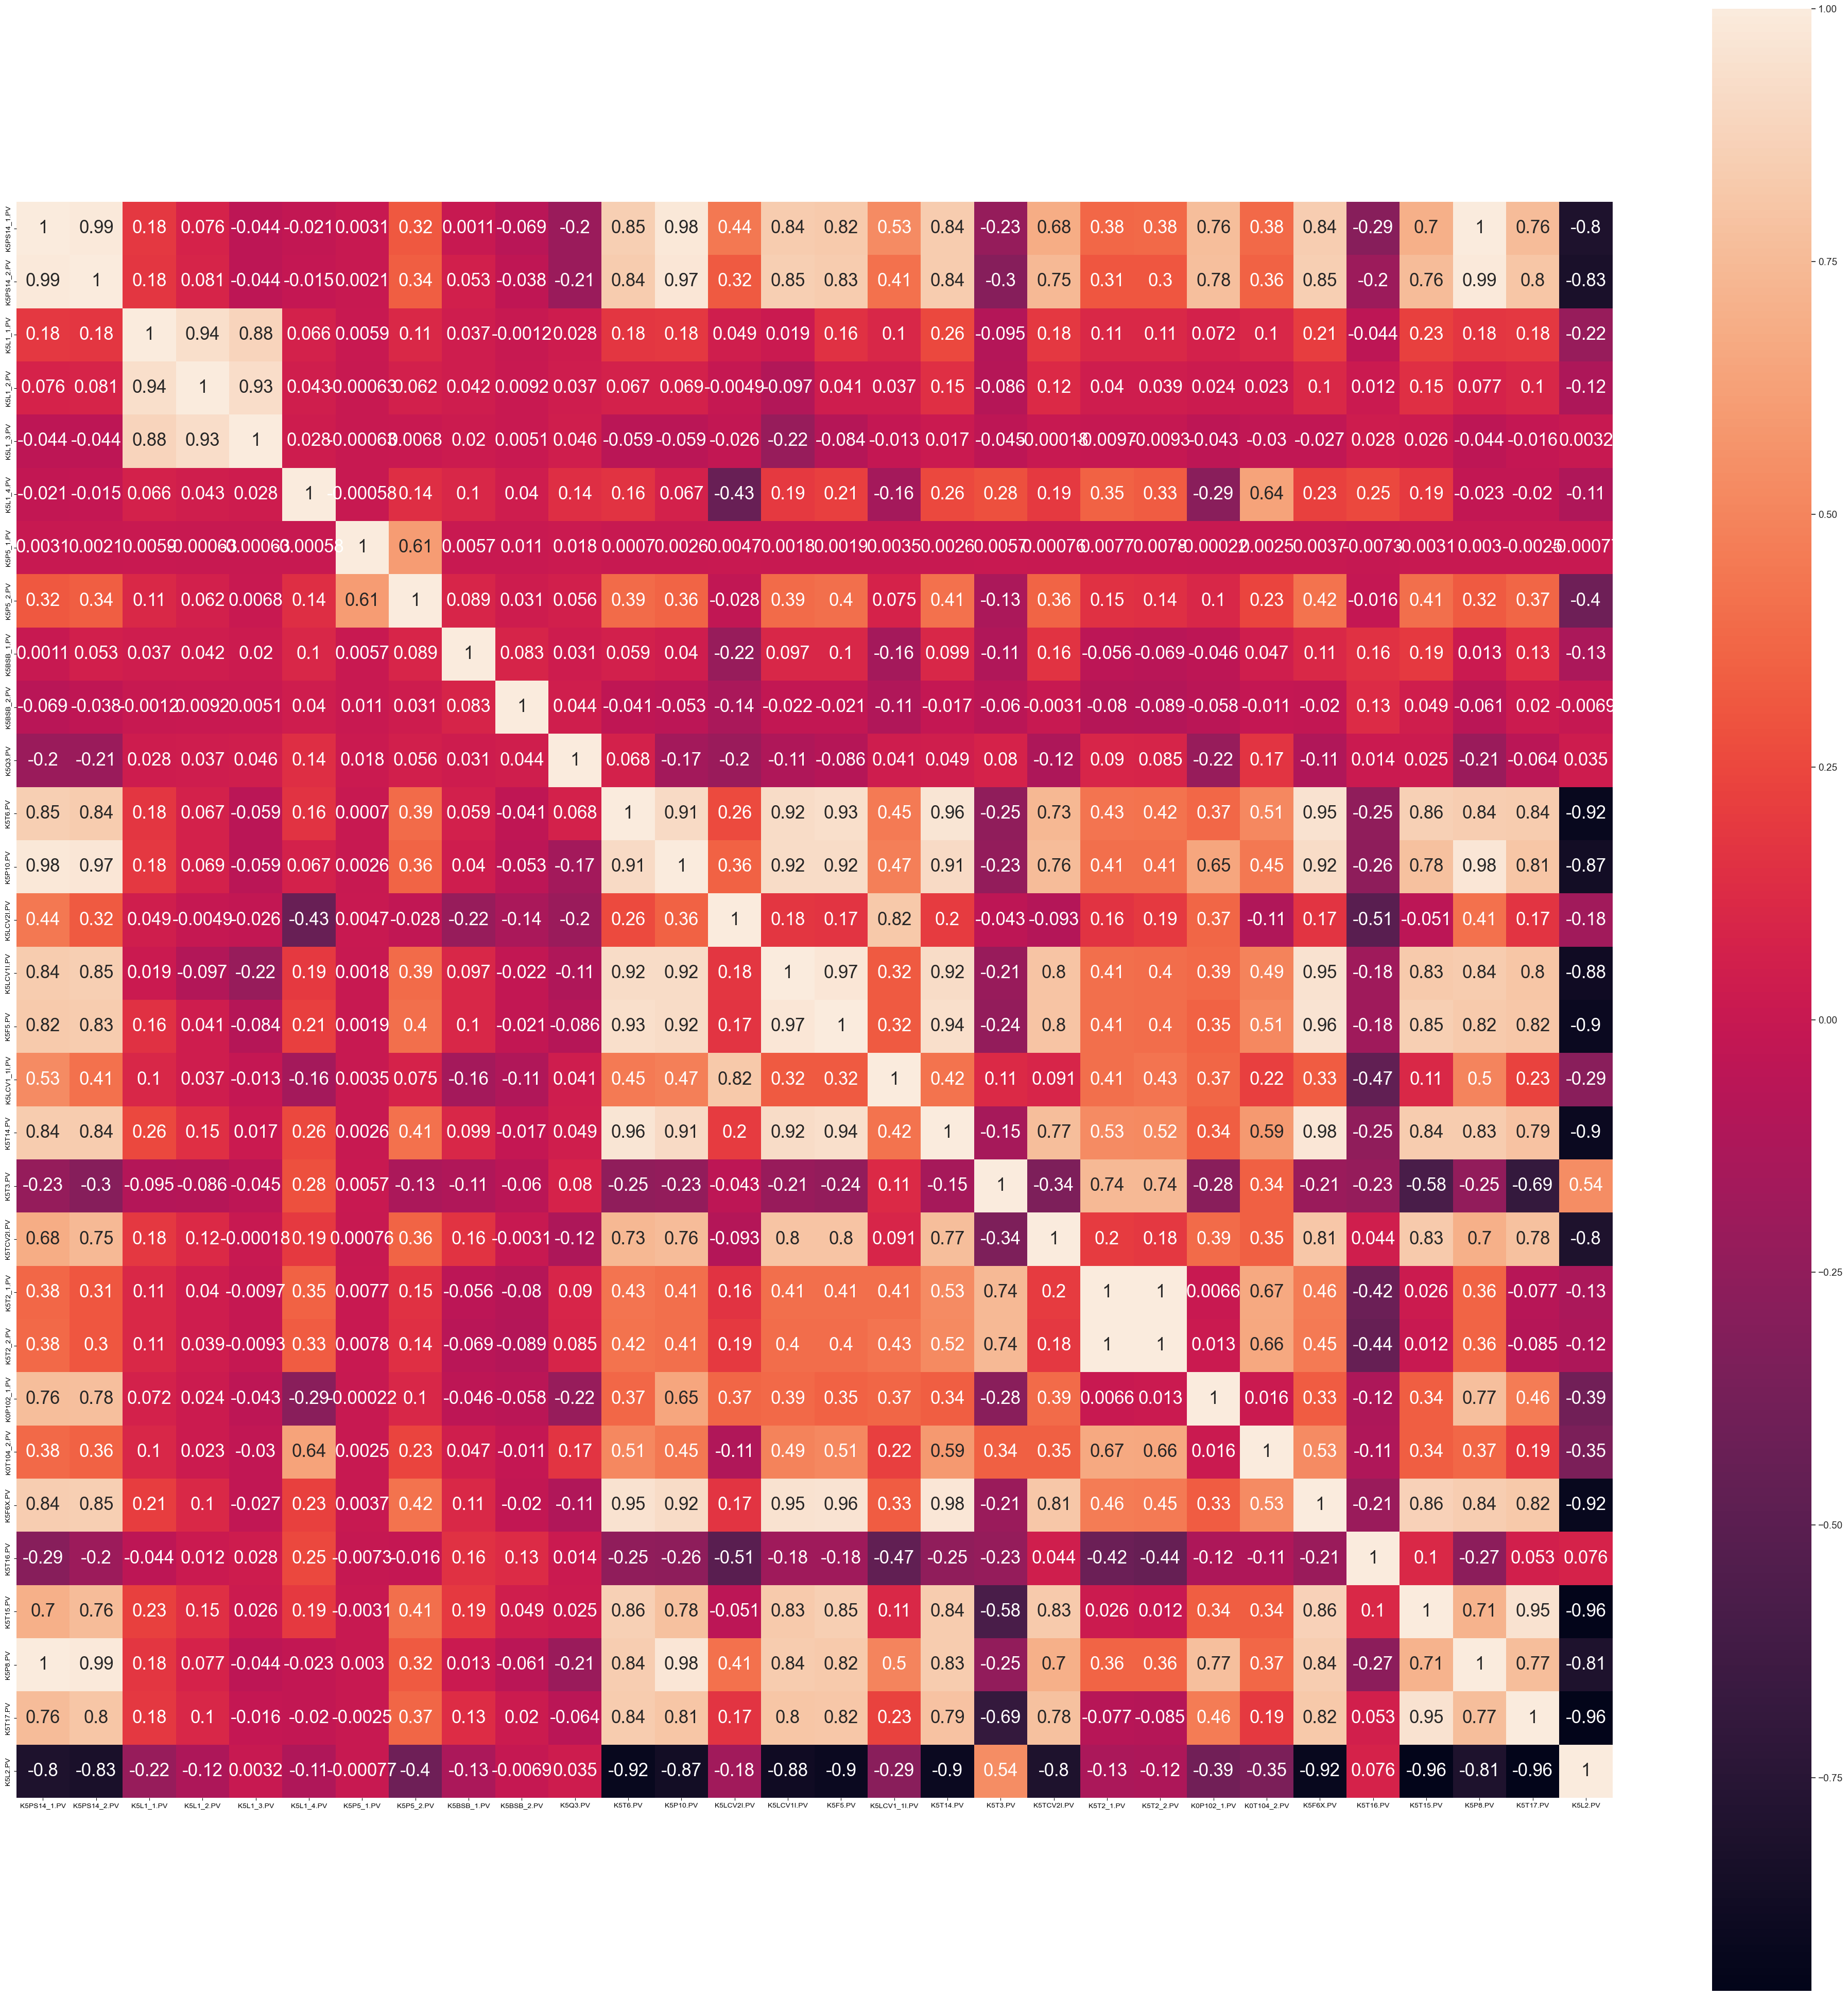

In [3]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [5]:
df = pd.read_csv('..\Initial_data\K5T6\K5T6.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_8076\246639532.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T6\K5T6.csv', ";")


,K5T6.PV,K5F5.PV,K5F6X.PV,K5T17.PV
0,179.9625,40.30084,33.31388,133.8431
1,179.9575,39.50022,33.23575,133.9694
2,179.9450,38.82552,33.15158,134.0287
3,179.9350,38.63737,33.35751,134.0981
4,179.9350,40.22277,33.30917,133.9388
...,...,...,...,...
25915,161.0000,28.28177,23.7995,120.3081
25916,159.0000,27.92846,23.10675,119.3031
25917,159.0000,28.64439,23.45422,120.1444
25918,157.0000,28.57065,22.49009,119.8369


In [6]:
df=df.dropna()
df=df.round(2)
df=df.drop_duplicates(["K5T6.PV"])
df=df.drop_duplicates(["K5F5.PV"])
df=df.drop_duplicates(["K5F6X.PV"])
df=df.drop_duplicates(["K5T17.PV"])
df

,K5T6.PV,K5F5.PV,K5F6X.PV,K5T17.PV
0,179.96,40.30,33.31388,133.84
2,179.94,38.83,33.15158,134.03
5,179.93,40.31,33.21245,133.78
7,179.90,38.66,33.33149,134.20
9,179.87,38.70,33.36482,134.26
...,...,...,...,...
25839,154.15,25.78,22.73341,115.13
25852,154.08,25.65,22.6799,116.63
25865,154.00,26.18,22.67378,115.33
25875,153.91,26.54,22.57023,116.62


In [7]:
y = df.drop(['K5F6X.PV', 'K5F5.PV', 'K5T17.PV'], axis=1)
x = df.drop(['K5T6.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)

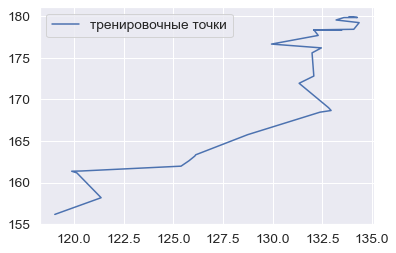

In [18]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

In [20]:
y = df.drop(['K5P10.PV', 'K5F5.PV', 'K5T14.PV', 'K5T17.PV'], axis=1)
x = df.drop(['K5T6.PV','K5P10.PV', 'K5F5.PV', 'K5T17.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(330, 380, 100)[:, np.newaxis] # Точки для предсказания

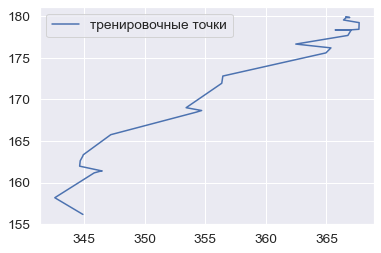

In [21]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

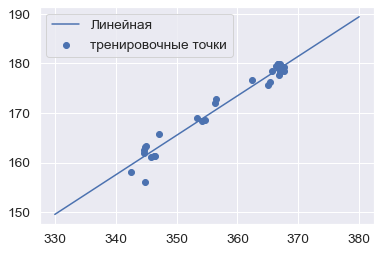

array([0.80615326, 0.84800109])

In [22]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=2)

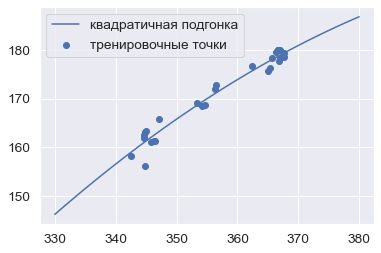

array([0.80615326, 0.84800109])

In [23]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

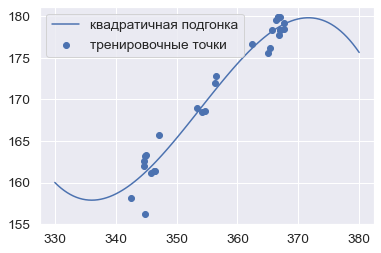

array([0.80615326, 0.84800109])

In [24]:
pr_3 = LinearRegression()
cube = PolynomialFeatures(degree=3)
X_cub = cube.fit_transform(X_train)   
pr_3.fit(X_cub, y_train)
y_pr = pr_3.predict(cube.fit_transform(task))
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_3, X_test, y_test, cv=2)

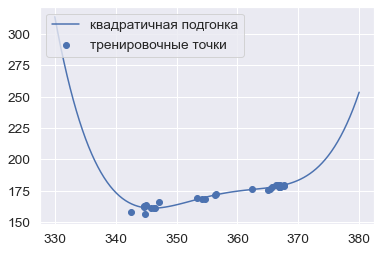

array([0.80615326, 0.84800109])

In [25]:
pr_4 = LinearRegression()
Fig = PolynomialFeatures(degree=4)
X_15 = Fig.fit_transform(X_train)   
pr_4.fit(X_15, y_train)
y_pr_4 = pr_4.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_4, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_4, X_test, y_test, cv=2)

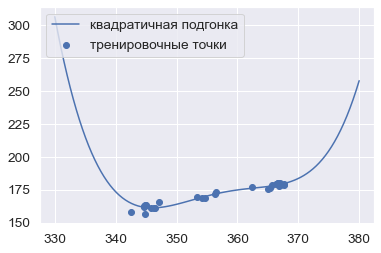

array([0.80615326, 0.84800109])

In [26]:
pr_5 = LinearRegression()
Fig = PolynomialFeatures(degree=5)
X_5 = Fig.fit_transform(X_train)   
pr_5.fit(X_5, y_train)
y_pr_5 = pr_5.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_5, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_5, X_test, y_test, cv=2)

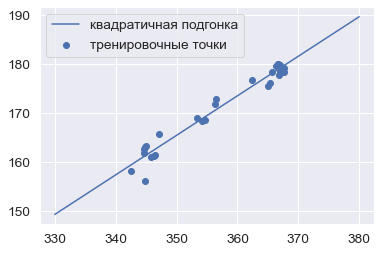

0.9719206548626604

In [27]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(X_test, y_test)

In [28]:
y1 = df.drop(['K5P10.PV', 'K5F5.PV', 'K5T14.PV', 'K5T17.PV'], axis=1)
x1 = df.drop(['K5T6.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20, random_state = 25)
#task = np.linspace(4, 4.5, 100)[:, np.newaxis] # Точки для предсказания

In [10]:
task1 = {'K5P10.PV':np.linspace(4, 4.5, 100),'K5F5.PV': np.linspace(20, 40, 100),"K5T14.PV":np.linspace(330, 380, 100), "K5T17.PV":np.linspace(100, 160, 100)}
df1 = pd.DataFrame(data=task1)
df1

,K5P10.PV,K5F5.PV,K5T14.PV,K5T17.PV
0,4.000000,20.000000,330.000000,100.000000
1,4.005051,20.202020,330.505051,100.606061
2,4.010101,20.404040,331.010101,101.212121
3,4.015152,20.606061,331.515152,101.818182
4,4.020202,20.808081,332.020202,102.424242
...,...,...,...,...
95,4.479798,39.191919,377.979798,157.575758
96,4.484848,39.393939,378.484848,158.181818
97,4.489899,39.595960,378.989899,158.787879
98,4.494949,39.797980,379.494949,159.393939


In [11]:
lasso = MultiTaskLassoCV(cv=5, random_state=1).fit(X_train, y_train)
lasso.score(x, y)
clf = Ridge(alpha=1.5)
clf.fit(X_train, y_train)
# y_pr=clf.predict(df1)
# plt.scatter(x, y, label = 'тренировочные точки') 
# plt.plot(task, y_pr, label = 'квадратичная подгонка') 
# plt.legend(loc='upper left') 
# plt.show()
# clf.score(X_test, y_test)

Ridge(alpha=1.5)

In [12]:
import pickle
filename = '../model/K5T6.sav'
pickle.dump(clf, open(filename, 'wb'))

In [13]:
loaded_model = pickle.load(open("../model/K5T6.sav", 'rb'))

In [14]:
task2 = {'K5F5.PV': [30.4],"K5F6X.PV":[32], "K5T17.PV":[117.2]}
df2 = pd.DataFrame(data=task2)
df2

,K5F5.PV,K5F6X.PV,K5T17.PV
0,30.4,32,117.2


In [15]:
loaded_model.predict(df2)

array([[166.84773295]])